In [1]:
import requests
import json
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [10]:
COUNTRY_DATA = {
        "USA": "United States",
        "ESP": "Spain",
        "HUN": "Hungary",
        "MAR": "Morocco",
        "CHL": "Chile",
        "HRV": "Croatia",
        "JPN": "Japan",
        "FIN": "Finland",
        "DEU": "Germany",
        "NZL": "New Zealand",
        "JOR": "Jordan",
        "ZAF" : "South Africa"
        # Add more countries as needed
    }

ADV_COUNTRIES  = [
        "USA",
        "ESP",
        "JPN",
        "FIN",
        "DEU",
        "NZL",
    ]

EMER_COUNTRIES = [
    "MAR",
    "CHL",
    "JOR",
    "ZAF",
    "HUN",
    "HRV",
]

INDICATORS = {
    "Population": "LP",
    "current account balance": "BCA_NGDPD",
    #"General government total expenditure": "GGX_NGDP",
    "General government net lending/borrowing": "GGXCNL_NGDP",
    #"General government structural balance": "GGXONLB_NGDP",
    #"General Government Revenue": "GGR_NGDP",
    "General government gross debt": "GGXWDG_NGDP",
    "Unemployment rate": "LUR",
    "GDP per Capita": "NGDPDPC",
    "Government revenue (% of GDP)": "rev",
    "Government expenditure (% of GDP)": "exp",
    "Gross public debt": "d",
    "Real GDP growth rate": "rgc",
    #"Export Quality Index": "SITC1_total",
    "Household Debt": "HH_ALL",
    #"Public Sector Debt (% of GDP)": "PS_DEBT_GDP",
    #"Trade balance (% of GDP)": "BT_GDP",
    #"Gross national savings (% of GDP)": "NGS_GDP"
    #"Gross national savings": "NGSD_NGDP",
    #"Total investment": "NID_NGDP"
}
TIME_SPAN = list(range(2018, 2023+1)) 

BASE_URL = "https://www.imf.org/external/datamapper/api/v1/"

In [11]:
def parseData(rawData):
    countries = []
    years = []
    values = []
    for country in data.keys():
        country_data = data[country]
        countries += [country]*len(country_data)
        years += country_data.keys()
        values += country_data.values()
        
    dfSource = {
        "Country": countries,
        "Year": years,
        indicator_id: values,
    }
    return pd.DataFrame(dfSource)

In [12]:
def mergeDFs(main_df, new_df):
    if main_df is None:
        return new_df
    else:
        return pd.merge(main_df, new_df, on=["Country","Year"], how="outer")

In [13]:
country_codes = "/".join(COUNTRY_DATA.keys())
periods = ",".join((str(y) for y in TIME_SPAN))

In [14]:
main_df = None
for indicator_name, indicator_id in INDICATORS.items():
    #for year in [2018]: #TIME_SPAN:
    #url = f"{base_url}/{indicator_id}/{country_code}?periods={year}"
    url = f"{BASE_URL}/{indicator_id}/{country_codes}?periods={periods}"
    print(url)
    #try:
    response = requests.get(url)
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        data = response.json()["values"][indicator_id]
        indicator_df = parseData(data)
        main_df = mergeDFs(main_df, indicator_df)
    else:
        print(response.status_code)
       

https://www.imf.org/external/datamapper/api/v1//LP/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://www.imf.org/external/datamapper/api/v1//BCA_NGDPD/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://www.imf.org/external/datamapper/api/v1//GGXCNL_NGDP/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://www.imf.org/external/datamapper/api/v1//GGXWDG_NGDP/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://www.imf.org/external/datamapper/api/v1//LUR/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://www.imf.org/external/datamapper/api/v1//NGDPDPC/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://www.imf.org/external/datamapper/api/v1//rev/USA/ESP/HUN/MAR/CHL/HRV/JPN/FIN/DEU/NZL/JOR/ZAF?periods=2018,2019,2020,2021,2022,2023
https://w

In [15]:
#main data indicators data frame 
main_df
#advanced countries data frame
advanced_df = main_df.loc[main_df["Country"].isin(ADV_COUNTRIES)]
advanced_df.reset_index(drop = True, inplace = True)
#emerging countries data frame
emerging_df = main_df.loc[main_df["Country"].isin(EMER_COUNTRIES)]
emerging_df.reset_index(drop = True, inplace = True)
advanced_df

,Country,Year,LP,BCA_NGDPD,GGXCNL_NGDP,GGXWDG_NGDP,LUR,NGDPDPC,rev,exp,d,rgc,HH_ALL
0,DEU,2018,82.906,8.0,1.9,61.9,3.2,47961.181,46.270900,44.320997,61.316347,0.983762,52.664577
1,DEU,2019,83.093,8.2,1.5,59.5,3.0,46810.283,46.528809,45.002547,58.925563,1.070506,53.503049
2,DEU,2020,83.161,7.1,-4.3,68.7,3.6,46711.984,46.122489,50.461788,67.986011,-3.829225,57.055937
3,DEU,2021,83.196,7.7,-3.6,69.0,3.6,51460.987,47.349984,50.936516,68.622975,3.168678,56.755744
4,DEU,2022,83.798,4.2,-2.5,66.1,3.1,48756.309,46.977618,49.477354,66.535292,1.804266,55.238489
5,DEU,2023,83.861,6.0,-2.9,65.9,3.3,52823.575,NaN,NaN,NaN,NaN,NaN
6,ESP,2018,46.729,1.9,-2.6,100.4,15.3,30438.338,39.218879,41.812538,100.415481,2.283134,62.889009
7,ESP,2019,47.105,2.1,-3.1,98.2,14.1,29603.298,39.223677,42.283942,98.221004,1.983288,60.804263
8,ESP,2020,47.356,0.6,-10.1,120.3,15.5,26968.374,41.784434,51.900430,120.265734,-11.165054,67.136975
9,ESP,2021,47.331,0.8,-6.8,116.8,14.8,30563.552,43.190896,49.977010,116.767508,6.399863,63.082574


In [28]:
#pulling specific columns
selected_adv_df = pd.DataFrame()
selected_emer_df = pd.DataFrame()
selected_adv_df = advanced_df.iloc[:,[0, 1, 2, 6, 10]]
selected_emer_df = emerging_df.iloc[:,[0, 1, 2, 6, 10]] #select which indicator via the column number starting at 0 for Country
selected_emer_df

,Country,Year,LP,LUR,d
0,CHL,2018,18.751,7.4,25.798028
1,CHL,2019,19.107,7.2,28.297729
2,CHL,2020,19.458,10.8,32.352589
3,CHL,2021,19.678,8.9,36.303300
4,CHL,2022,19.829,7.9,37.975480
5,CHL,2023,19.961,8.8,NaN
6,HRV,2018,4.088,9.9,74.452168
7,HRV,2019,4.065,7.8,71.945971
8,HRV,2020,4.048,9.0,86.778855
9,HRV,2021,3.879,8.1,78.585761


# Advanced Countries Barplot


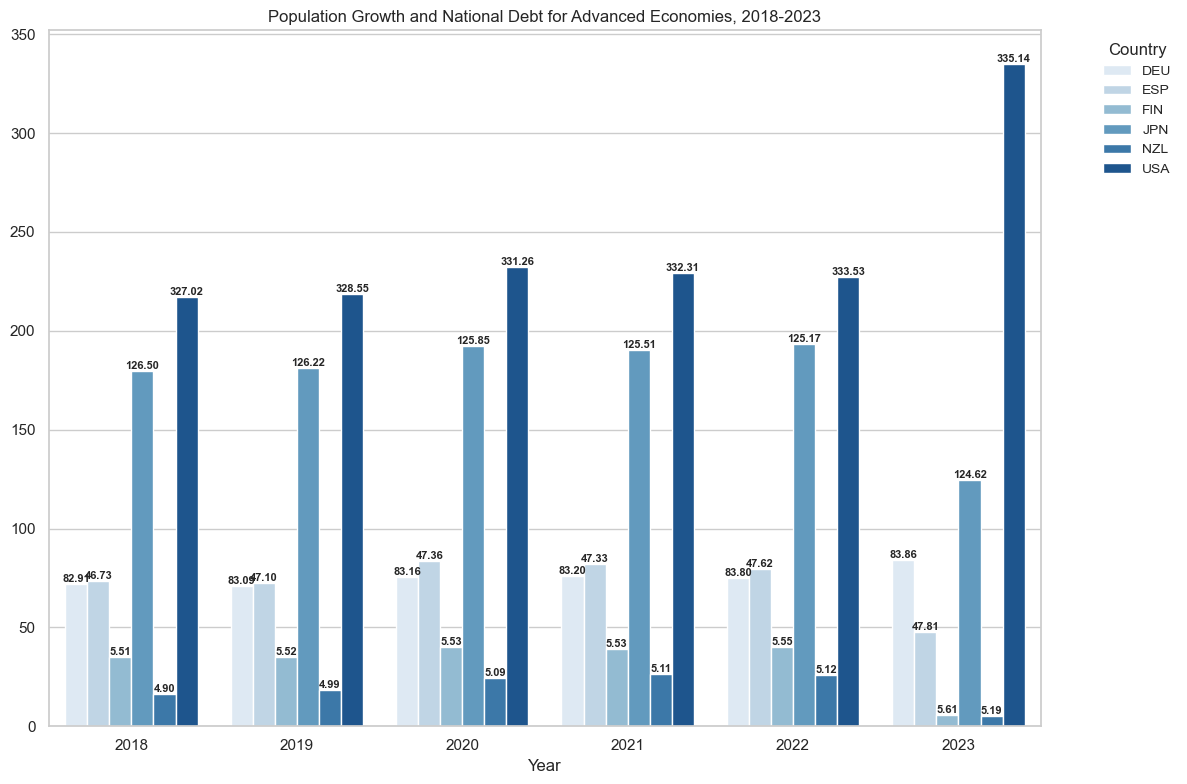

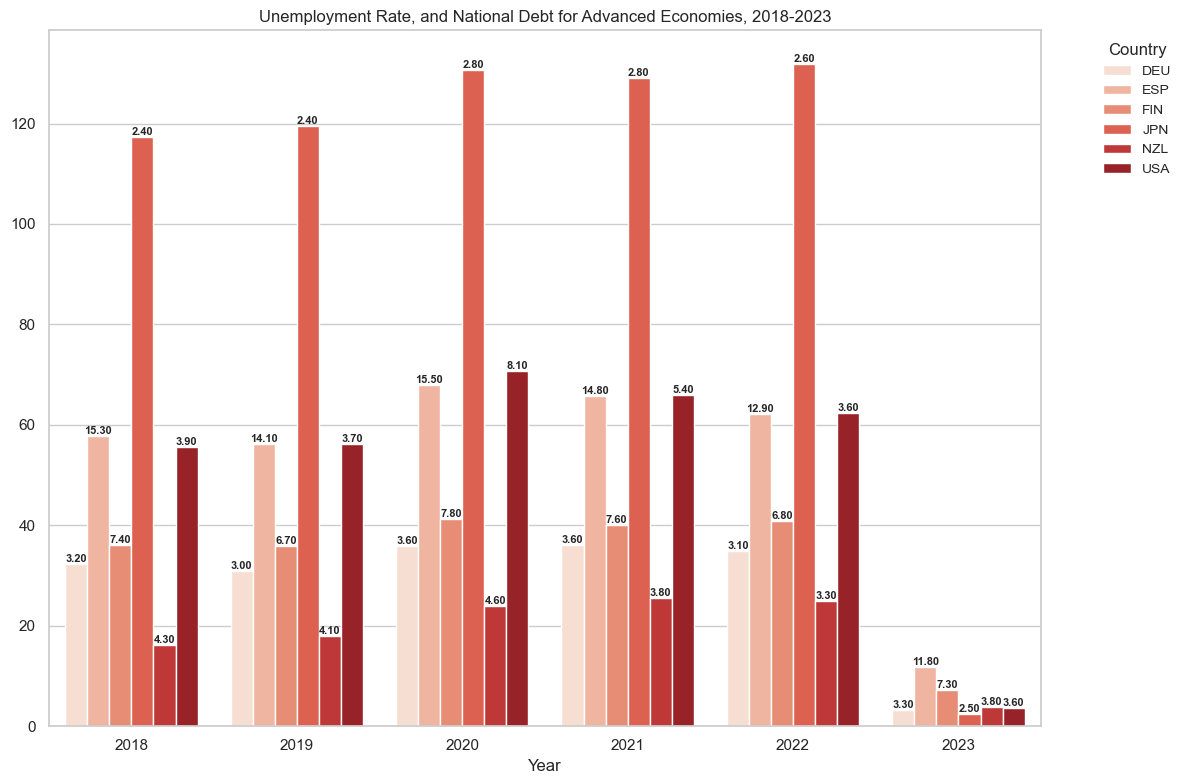

In [18]:
# set seaborn style
sns.set(style="whitegrid")

# choose the preferred palette for the index Country
lp_palette = sns.color_palette("Blues", len(selected_adv_df['Country'].unique()))
lur_palette = sns.color_palette("Reds", len(selected_adv_df['Country'].unique()))

# Melt the DataFrame to reshape it for barplot
melted_df_lp = pd.melt(selected_adv_df, id_vars=['Year', 'Country'], 
                       value_vars=['LP', 'd'], var_name='Variable', value_name='Value')
melted_df_lur = pd.melt(selected_adv_df, id_vars=['Year', 'Country'], 
                        value_vars=['LUR', 'd'], var_name='Variable', value_name='Value')

# create LP figure, D variable is mentioned in numeric value
plt.figure(figsize=(12, 8))
lp_plot = sns.barplot(x='Year', y='Value', hue='Country', data=melted_df_lp, palette=lp_palette, errorbar=None)
for bar, value in zip(lp_plot.patches, melted_df_lp['Value']):
    lp_plot.annotate(f'{value:.2f}', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.title('Population Growth and National Debt for Advanced Economies, 2018-2023')
plt.xlabel('Year')
plt.ylabel('')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', 
           title_fontsize='12', fontsize='10', frameon=False)

# adjust the size of the figure to show all numbers
plt.tight_layout()

# save the plot
plt.savefig('bar_plots_advLP.png')

# create LUR figure, D variable is mentioned in numeric value
plt.figure(figsize=(12, 8))
lur_plot = sns.barplot(x='Year', y='Value', hue='Country', data=melted_df_lur, palette=lur_palette, errorbar=None)
for bar, value in zip(lur_plot.patches, melted_df_lur['Value']):
    lur_plot.annotate(f'{value:.2f}', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom', fontsize=8, fontweight='bold')

# set up the value for the x, y and title
plt.title('Unemployment Rate, and National Debt for Advanced Economies, 2018-2023')
plt.xlabel('Year')
plt.ylabel('')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize='12', fontsize='10', frameon=False)
plt.tight_layout()


# save the figure
plt.savefig('bar_plots_adv.png')

# display the barplot
plt.show()

# Emerging Countries Barplot


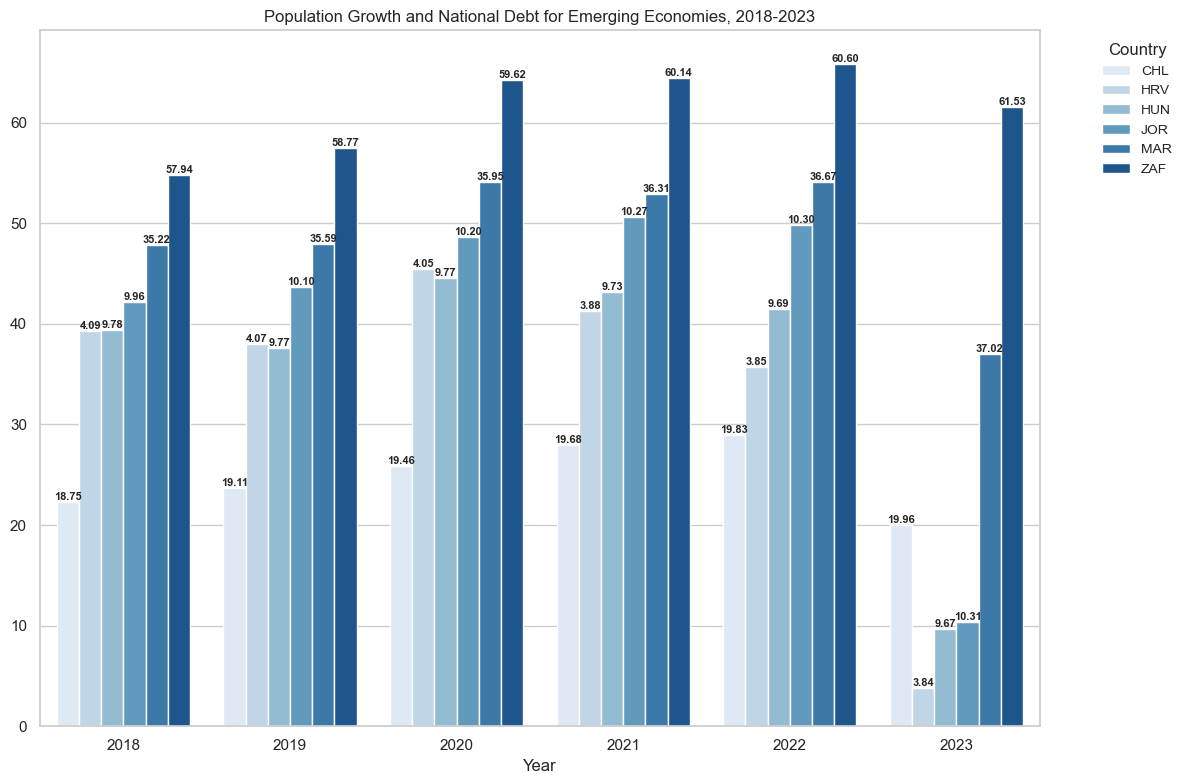

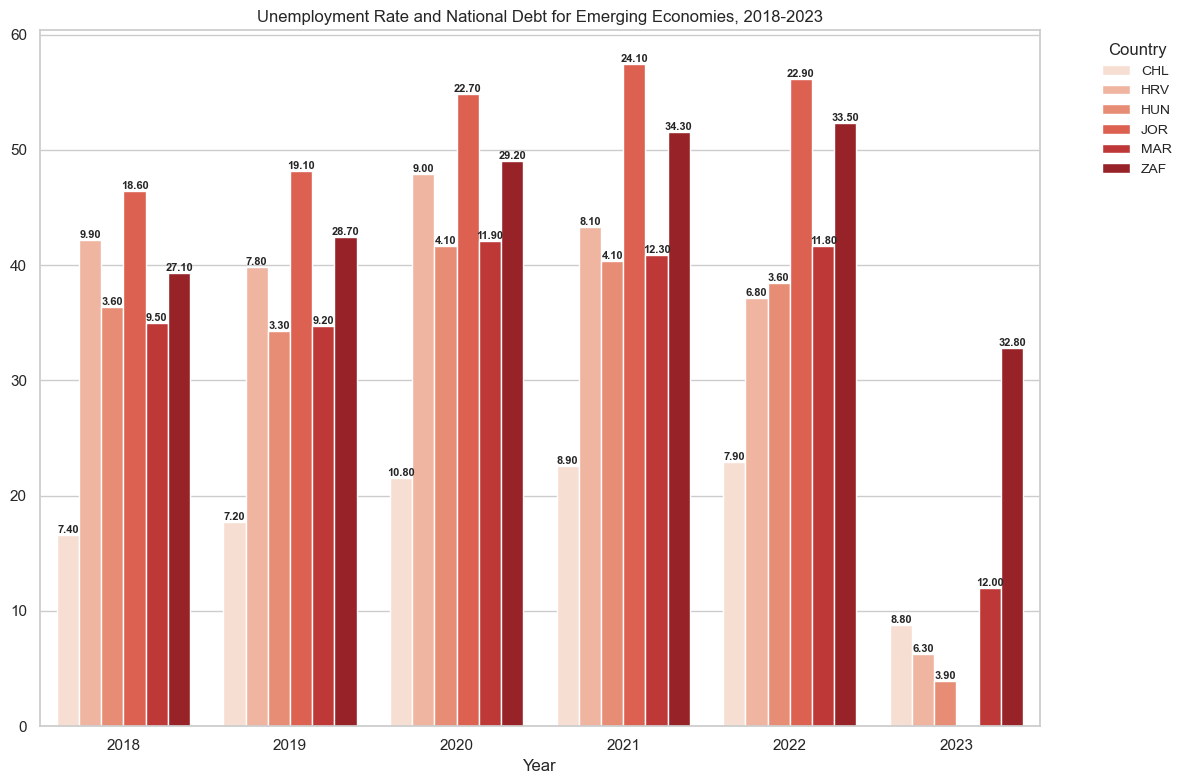

In [17]:
# set seaborn style
sns.set(style="whitegrid")

# choose the preferred palette for the index Country
lp_palette = sns.color_palette("Blues", len(selected_emer_df['Country'].unique()))
lur_palette = sns.color_palette("Reds", len(selected_emer_df['Country'].unique()))

# Melt the DataFrame to reshape it for barplot
melted_df_lp = pd.melt(selected_emer_df, id_vars=['Year', 'Country'], value_vars=['LP', 'd'], var_name='Variable', value_name='Value')
melted_df_lur = pd.melt(selected_emer_df, id_vars=['Year', 'Country'], value_vars=['LUR', 'd'], var_name='Variable', value_name='Value')

# create LP figure, D variable is mentioned in numeric value
plt.figure(figsize=(12, 8))
lp_plot = sns.barplot(x='Year', y='Value', hue='Country', data=melted_df_lp, palette=lp_palette, errorbar=None)
for bar, value in zip(lp_plot.patches, melted_df_lp['Value']):
    lp_plot.annotate(f'{value:.2f}', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.title('Population Growth and National Debt for Emerging Economies, 2018-2023')
plt.xlabel('Year')
plt.ylabel('')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize='12', fontsize='10', frameon=False)
plt.tight_layout()

# save the plot
plt.savefig('bar_plots_emerLP.png')

# create LUR figure, D variable is mentioned in numeric value
plt.figure(figsize=(12, 8))
lur_plot = sns.barplot(x='Year', y='Value', hue='Country', data=melted_df_lur, palette=lur_palette, errorbar=None)
for bar, value in zip(lur_plot.patches, melted_df_lur['Value']):
    lur_plot.annotate(f'{value:.2f}', (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='bottom', fontsize=8, fontweight='bold')

# set up the value for the x, y and title
plt.title('Unemployment Rate and National Debt for Emerging Economies, 2018-2023')
plt.xlabel('Year')
plt.ylabel('')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize='12', fontsize='10', frameon=False)
plt.tight_layout()

# save the plot
plt.savefig('bar_plots_emer.png')

# display the barplot
plt.show()

# Advanced Economies Heatmap

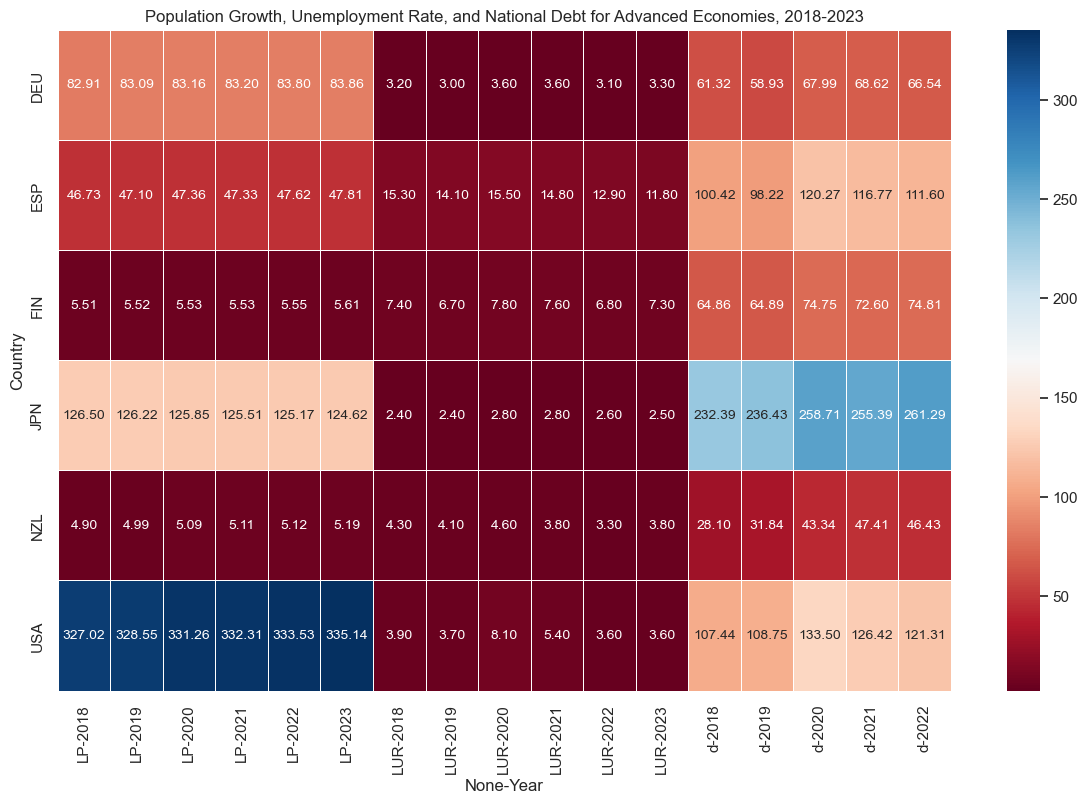

In [24]:
# using pivot for the dataframe, country should be set as index for better comparison for all 3 variables.
heatmap_data = selected_adv_df.pivot_table(index='Country', columns='Year', values=['LP', 'LUR', 'd'], aggfunc='mean')

# create the heatmap plot
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(heatmap_data, cmap='RdBu', annot=True, fmt=".2f", linewidths=0.5, annot_kws={"size": 10})

# Fixing cells to display numbers better
plt.tight_layout()

# set up the title
plt.title('Population Growth, Unemployment Rate, and National Debt for Advanced Economies, 2018-2023')

# display the heatmap
plt.show()

# Emerging Economies Heatmap

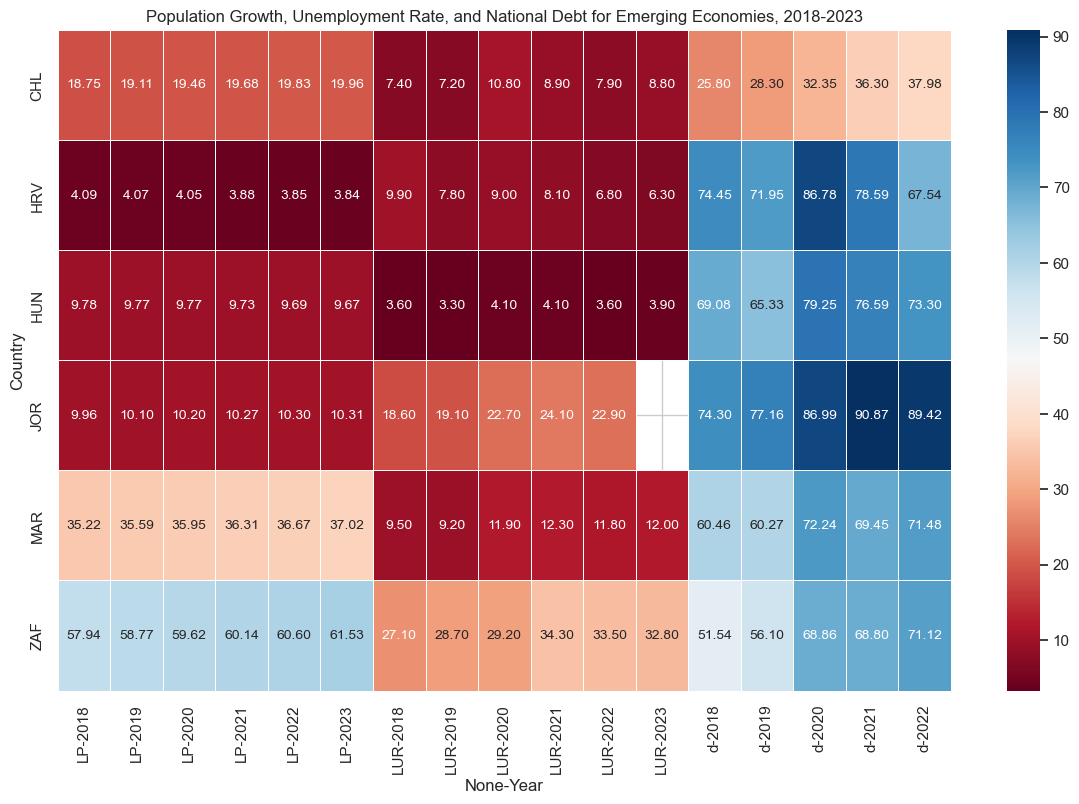

In [25]:
# using pivot for the dataframe, country should be set as index for better comparison for all 3 variables.
heatmap_data_emer = selected_emer_df.pivot_table(index='Country', columns='Year', values=['LP', 'LUR', 'd'], aggfunc='mean')

# create the heatmap plot
plt.figure(figsize=(12, 8))
heatmap_emer = sns.heatmap(heatmap_data_emer, cmap='RdBu', annot=True, fmt=".2f", linewidths=0.5, annot_kws={"size": 10})

# Fixing cells to display numbers better
plt.tight_layout()

# set up the title
plt.title('Population Growth, Unemployment Rate, and National Debt for Emerging Economies, 2018-2023')

# display the heatmap
plt.show()

# Calculate the Average

  Country        LUR           d          LP
0     DEU   3.300000   53.897698   83.335833
1     ESP  14.066667   91.210925   47.324333
2     FIN   7.266667   58.651714    5.541000
3     JPN   2.583333  207.368070  125.644000
4     NZL   3.983333   32.852963    5.066333
5     USA   4.716667   99.567082  331.302333
6     NaN   5.986111   90.591409   99.702306


/Users/owner/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


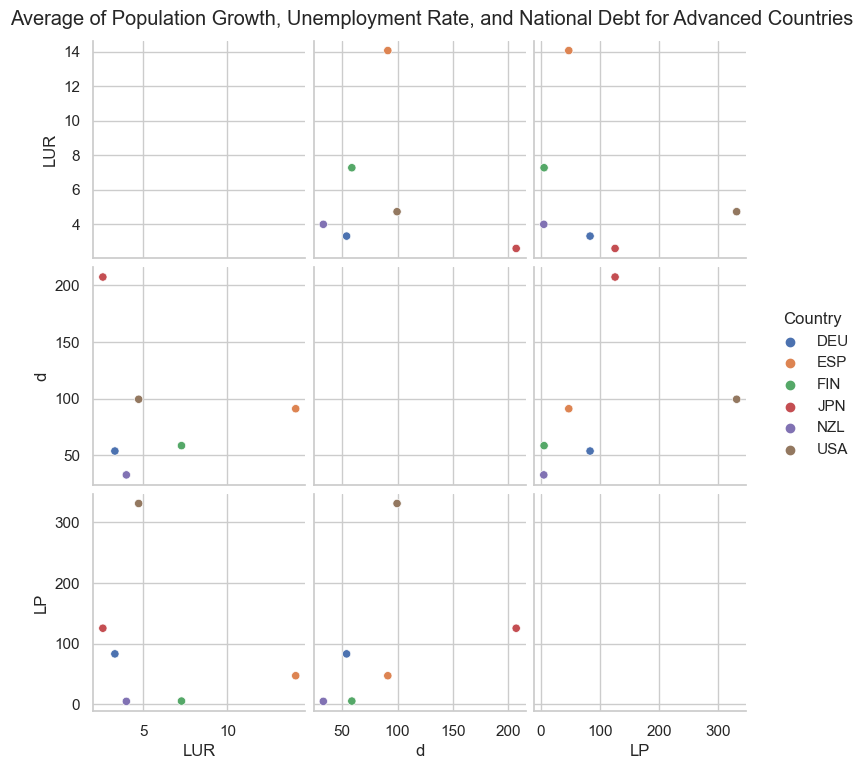

In [85]:
# calcuale avergae as group for 'LUR', 'd', and 'LP' for each country
average_data = selected_adv_df.groupby('Country').agg({
    'LUR': 'mean',
    'd': 'mean',
    'LP': 'mean'
}).reset_index()

# add the average into the rows
average_data = pd.concat([average_data, pd.DataFrame({
    'LUR': [average_data['LUR'].mean()],
    'd': [average_data['d'].mean()],
    'LP': [average_data['LP'].mean()]
})], ignore_index=True)

# display the results
print(average_data)

# create the pairplot for the countries 
figure = sns.pairplot(average_data, hue='Country', markers='o')

figure.fig.suptitle('Average of Population Growth, Unemployment Rate, and National Debt for Advanced Countries', y=1.02)

# display the plot
plt.show()

  Country        LUR          d         LP
0     CHL   8.500000  26.787854  19.464000
1     HRV   7.983333  63.216345   3.962500
2     HUN   3.766667  60.592603   9.735333
3     JOR  21.480000  69.791972  10.192000
4     MAR  11.116667  55.651264  36.127167
5     ZAF  30.933333  52.736382  59.768500
6     NaN  13.963333  54.796070  23.208250


/Users/owner/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


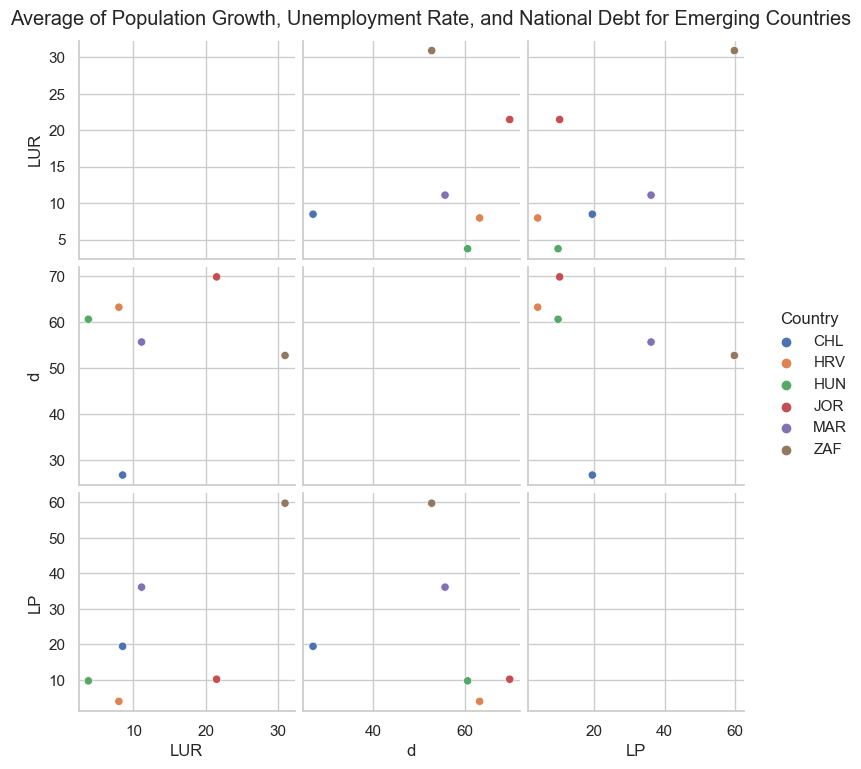

In [84]:
# calcuale avergae as group for 'LUR', 'd', and 'LP' for each country
average_data = selected_emer_df.groupby('Country').agg({
    'LUR': 'mean',
    'd': 'mean',
    'LP': 'mean'
}).reset_index()

# add the average into the rows
average_data = pd.concat([average_data, pd.DataFrame({
    'LUR': [average_data['LUR'].mean()],
    'd': [average_data['d'].mean()],
    'LP': [average_data['LP'].mean()]
})], ignore_index=True)

# display the results
print(average_data)

# create the pairplot for the countries 
figure = sns.pairplot(average_data, hue='Country', markers='o')

figure.fig.suptitle('Average of Population Growth, Unemployment Rate, and National Debt for Emerging Countries', y=1.02)


# display the plot
plt.show()

